In [43]:
import cv2
import pandas as pd
from IPython.display import display
import os
import math
import random
import shutil
import imgaug.augmenters as aug
from IPython.display import display, Markdown, Latex

In [2]:
# Mounting google Drive
try:
    from google.colab import drive
    drive.mount('/content/drive')
    folder_path = 'drive/MyDrive/TesisMV/'
except:
    folder_path = '../'

In [19]:
df_labels = pd.read_json(folder_path + "labels/normalized_df.json", orient='index', encoding='latin-1')
display(df_labels)
df_classes = pd.read_csv(folder_path + "labels/class_labels.csv", index_col=0)
display(df_classes)
df_labels_class = df_labels.join(df_classes, how='inner')
display(df_labels_class)

,pendent,teardrop,horizontal,panel,group,vertical,bar,floating,enclosing,shorter,...,light,body,bird,striped,worm,angular,raised,head,bird-seed,long
1a,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1b,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1c,0,0,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1d,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1e,0,0,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96e,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
96f,0,0,0,1,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
96g,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
96h,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


,chapter,subchapter
1a,strokes and lines,strokes
1b,strokes and lines,strokes
1c,strokes and lines,strokes
1d,strokes and lines,strokes
1e,strokes and lines,strokes
...,...,...
96e,pictographics,trees and animals
96f,pictographics,trees and animals
96g,pictographics,trees and animals
96h,pictographics,trees and animals


,pendent,teardrop,horizontal,panel,group,vertical,bar,floating,enclosing,shorter,...,bird,striped,worm,angular,raised,head,bird-seed,long,chapter,subchapter
1a,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,strokes and lines,strokes
1b,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,strokes and lines,strokes
1c,0,0,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,strokes and lines,strokes
1d,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,strokes and lines,strokes
1e,0,0,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,strokes and lines,strokes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96e,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,pictographics,trees and animals
96f,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,pictographics,trees and animals
96g,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,pictographics,trees and animals
96h,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,pictographics,trees and animals


In [26]:
df_grouped = df_labels_class.drop(columns='subchapter').groupby(['chapter']).sum()
display(df_grouped)

,pendent,teardrop,horizontal,panel,group,vertical,bar,floating,enclosing,shorter,...,light,body,bird,striped,worm,angular,raised,head,bird-seed,long
chapter,,,,,,,,,,,,,,,,,,,,,
circular ornaments,6,0,64,71,0,11,3,1,76,0,...,0,0,0,0,0,0,0,0,0,0
lozenge,0,0,31,53,0,26,3,2,8,0,...,0,0,0,0,0,0,0,0,0,0
pictographics,0,0,17,25,0,10,1,0,0,0,...,1,18,22,1,1,1,2,1,1,2
rectangular ornaments,3,0,79,93,1,17,3,0,2,0,...,0,0,0,0,0,0,0,0,0,0
strokes and lines,3,2,56,63,4,38,35,1,1,1,...,0,0,0,0,0,0,0,0,0,0
triangular ornaments,9,0,84,103,5,38,7,7,8,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
labels_group = {}

for group in df_grouped.index:
    labels_group[group] = []
    match = df_grouped.loc[group].loc[df_grouped.loc[group].gt(0)]
    labels_group[group] = match.index.values.tolist()

labels_group_unique = {}
for group in labels_group.keys():
    labels_cp = labels_group[group].copy()
    for groupB, labelsB in labels_group.items():
        if group!=groupB:
            for labelB in labelsB:
                if labelB in labels_cp:
                    labels_cp.remove(labelB)
    labels_group_unique[group] = labels_cp

labels_qty = {}
for group, labels in labels_group_unique.items():
    labels_qty[group] = len(labels)
    display(Markdown('### {} unique labels: {}'.format(group, len(labels))))
    display(labels)

labels_qty = pd.DataFrame.from_dict(labels_qty, orient='index')

### circular ornaments unique labels: 57

['rectangular',
 'rosette',
 'flower',
 'spiked',
 'eight-armed',
 'floor',
 'stalked',
 'sixteen-pointed',
 'point',
 'lightning-wheel',
 'semicircle',
 'three-quarter',
 'disposition',
 'quarter-circle',
 'sound-waves',
 'scale',
 'losenges',
 'eleven-pointed',
 'forming',
 'lined',
 'branch',
 'dif.',
 'm',
 'triple-line',
 'maltese',
 'three-winged',
 'fan',
 'midrib',
 'connecting',
 'arc',
 'near',
 'rim',
 'v-shaped',
 'four-leaved',
 'twelve-leaved',
 'seven-leaved',
 'four-spoked',
 'wheel',
 'circular',
 'sunburst',
 'flanking',
 'tangent',
 'tagential',
 'tangets',
 'elongated',
 'crossed',
 'concentrique',
 'cable',
 'doted',
 "s's",
 'spiral',
 'inner',
 'looped',
 's',
 'running',
 'half-circles',
 'pothook']

### lozenge unique labels: 19

['two-tiered',
 'outwards',
 'b:',
 'slack',
 'outside',
 'three-tiered',
 'four-tiered',
 'triple-outline',
 'quatered',
 'side',
 'cross-hathed',
 'linked',
 'check',
 'tapestry',
 'net.',
 'like',
 'underlying',
 'schematized',
 'lozenge-cross']

### pictographics unique labels: 17

['tongue',
 'plant',
 'figure',
 'volute',
 'palm-tree',
 'fish',
 'serpent',
 'light',
 'body',
 'bird',
 'striped',
 'worm',
 'angular',
 'raised',
 'head',
 'bird-seed',
 'long']

### rectangular ornaments unique labels: 56

['rectangle',
 'innermost',
 'set',
 'coffer',
 'cross-bar',
 'latticed/dotted/stacked',
 'saltire',
 'doubled',
 't-shaped',
 'stalk',
 'strong',
 'half-moon',
 'double-halfmoon',
 'octofail',
 'battlement',
 'zigzag-filled',
 'interspaces',
 'link',
 'high',
 'slim',
 'attached',
 'frgt.',
 'gear-pattern',
 'formed',
 'turning',
 'meander',
 'reversed',
 'b',
 'intertwined',
 'quadruple',
 'step',
 'additional',
 'downward',
 'turn',
 'wind',
 'connected',
 't-meander',
 'beam',
 'remaining',
 'meander-like',
 'z-shaped',
 'continuous',
 'repetition',
 'alternatively',
 'meander-type',
 'trident',
 'sape',
 'two-sided',
 "'comb'",
 'type',
 'mÃ£Â©andre',
 'hachurÃ£Â©',
 'panneau',
 'acute-angled',
 'hooked',
 'arm']

### strokes and lines unique labels: 20

['teardrop',
 'shorter',
 'Unnamed: 11',
 'framed',
 'pannel',
 'inserted',
 'crossing',
 'comb-like',
 'free',
 'design',
 'diagonally',
 'half-lines',
 'interlocked',
 'latticing',
 'separated',
 'obliquely',
 'steep',
 'wave',
 'moon',
 'lightning']

### triangular ornaments unique labels: 51

['upwards',
 'arrow',
 'shape',
 'intersecting',
 'version',
 'previous',
 'form',
 'border',
 'form-square',
 'schoulder',
 'intertwinded',
 'linear',
 'rhodian',
 'root',
 'stock',
 'dogtooth',
 'downwards',
 'accompanied',
 'antithetic',
 'ray',
 'direction',
 'hour-glasses',
 'ax',
 'axe',
 'superimposed',
 'dissimilar',
 'white',
 'dark',
 'massive',
 'spacious',
 'obtuse',
 'metope-triglyph-frieze',
 'e',
 'cut',
 'ear',
 'corn',
 'v-chevrons',
 "v's",
 'facing',
 'three-limbed',
 'sigma',
 'turned',
 'four-limbed',
 'm-chevrons',
 'limbed',
 'scribble',
 'degeneration',
 'variously',
 'unframed',
 'tadpole',
 'dash']

In [87]:
labels_qty['Clase'] = labels_qty.index
labels_qty = labels_qty.rename(columns={0: 'Etiquetas'})

In [91]:
import plotly.express as px
fig = px.histogram(labels_qty, x='Clase', y = 'Etiquetas', width=600, height=400)
fig.update_layout(title_text='Etiquetas únicas por clase')
fig.show()

---

In [44]:
import os
import pickle
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
#import torch
#import torch.nn as nn
#import torchvision
#import torchvision.transforms as transforms
from PIL import Image
#import torchvision.models as models
import math
#from torch.nn.utils.rnn import pack_padded_sequence
from sklearn.metrics import accuracy_score,hamming_loss, accuracy_score, f1_score, precision_score, recall_score

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [37]:
root_dir = ".."
SUBCHAPTERS = False
DS_FLAGS = ['blur']
              # 'ref': [invertX, invertY],
              # 'rot': [rotate90, rotate180, rotate270],
              # 'crop': [crop] * CROP_TIMES,
              # 'blur': [blur],
              # 'gausblur': [gausblur]
              # 'msblur': [msblur]
              # 'mtnblur': [mtnblur]
              # 'emboss': [emboss],
              # 'randaug': [randaug],
              # 'rain': [rain],
              # 'elastic': [elastic]
CROP_TIMES = 2
RANDOM_TIMES = 1
ELASTIC_TIMES = 1
GAUSBLUR_TIMES = 1

use_pos_weights = True
pos_weights_factor = 1
NUM_LABELS = 26
use_testval = True

# para relela: 0 es 3090, 1 y 2 son 2080
# para local: 0 es 1060ti
CUDA_ID = 0

In [38]:
# This cells builds the data_flags variable, that will be used
# to map the requested data treatment to folders
MAP_TIMES = {'crop': CROP_TIMES,
         'randaug': RANDOM_TIMES,
         'elastic': ELASTIC_TIMES,
         'gausblur': GAUSBLUR_TIMES,
}

DS_FLAGS = sorted(DS_FLAGS)
data_flags = '_'.join(DS_FLAGS) if len(DS_FLAGS) > 0 else 'base'
MULTIPLE_TRANSF = ['crop', 'randaug', 'elastic', 'gausblur']
COPY_FLAGS = DS_FLAGS.copy()

for t in MULTIPLE_TRANSF:
    if t in DS_FLAGS:
        COPY_FLAGS.remove(t)
        COPY_FLAGS.append(t + str(MAP_TIMES[t]))
        data_flags = '_'.join(COPY_FLAGS)

patterns_path = os.path.join(root_dir, 'patterns', data_flags) 
labels_path = os.path.join(root_dir, 'labels', data_flags)

if not (os.path.isdir(patterns_path) and os.path.isdir(labels_path)):
    raise FileNotFoundError("No existen directorios de datos para el conjunto de flags seleccionado. Verifique que el dataset exista en {}".format(
        (os.path.isdir(patterns_path), os.path.isdir(labels_path))))
print("Patterns set encontrado en {}".format(patterns_path))
print("Labels set encontrado en {}".format(labels_path))

exp_name = f"{NUM_LABELS}L"
exp_name += "_testval" if use_testval else ""
weights_str = str(pos_weights_factor)
weights_str = weights_str.replace('.','_')
exp_name += f'_weighted_{weights_str}' if use_pos_weights else ''
print(f"Nombre del experimento: {exp_name}")

output_dir = os.path.join(root_dir, "outputs", "alexnet", data_flags, exp_name)
pred_path = os.path.join(output_dir, "predictions.csv")
print(f"Las predicciones se cargarán desde: {pred_path}")

Patterns set encontrado en ..\patterns\blur
Labels set encontrado en ..\labels\blur
Nombre del experimento: 26L_testval_weighted_1
Las predicciones se cargarán desde: ..\outputs\alexnet\blur\26L_testval_weighted_1\predictions.csv


In [39]:
labels_train = pd.read_json(os.path.join(labels_path, 'augmented_train_df.json'), orient='index')
labels_val = pd.read_json(os.path.join(labels_path, 'val_df.json'), orient='index')
labels_test = pd.read_json(os.path.join(labels_path, 'test_df.json'), orient='index')
labels_test_val = pd.DataFrame.append(labels_test, labels_val)

C:\Users\m_jvs\AppData\Local\Temp\ipykernel_10912\2348087222.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels_test_val = pd.DataFrame.append(labels_test, labels_val)


In [129]:
def filter_dfs(df, top_labels_df):
  df = df[df.columns.intersection(top_labels_df.index)]
  return df

def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14, normalize=True):
    """
    Prints confusion matrix for multilabel classification.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    if normalize:
        df_cm = df_cm / df_cm.sum(axis=0)
    heatmap = sns.heatmap(df_cm, annot=True, fmt=".2f", cbar=False, ax=axes, cmap='Blues', annot_kws={"size": 12})
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title(class_label)

def plot_multiple_matrix(cfs_matrix, present_labels, nrows=5, ncols=5, figsize=(6,10), filename="results", normalize=True):
  """
  Plots multiple confusion matrix

  Parameters:
  cfs_matrix (2D array): an array containing the multiple confusion matrix as
                         outcome of multilabel_confusion_matrix()
  present_labels (1D array): array of strings with name of labels, in the same
                             order as they are in cfs_matrix
  nrows, ncols, figsize: number of rows, columns and size of the plot
  
  """
  fig, ax = plt.subplots(nrows, ncols, figsize=figsize)

  for axes, cfs_vals, label in zip(ax.flatten(), cfs_matrix, present_labels):
      print_confusion_matrix(cfs_vals, axes, label, ["N", "Y"], normalize=normalize)

  fig.tight_layout()
  plt.show()
  #plt.savefig(filename + ".png")

def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    http://stackoverflow.com/q/32239577/395857
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        #print('\nset_true: {0}'.format(set_true))
        #print('set_pred: {0}'.format(set_pred))
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
    return np.mean(acc_list)

In [130]:
predictions = pd.read_csv(pred_path, index_col=0)
predictions = predictions.to_numpy()
NUM_LABELS = predictions.shape[1]

print(f"ATENCIÓN: El archivo de predicciones tiene {predictions.shape[1]} etiquetas")

train_labels = pd.read_json(os.path.join(labels_path, 'augmented_train_df.json'), orient='index')
if not os.path.isfile(os.path.join(root_dir, 'labels', f'top_{NUM_LABELS}L.pickle')):
    raise Exception("No se logró cargar top_labels")
else:
    print(f"Usando top_labels previamente generados para {NUM_LABELS} labels")
    with open(os.path.join(root_dir, 'labels', f'top_{NUM_LABELS}L.pickle'), 'rb') as f:
        top_labels = pickle.load(f)
    print(top_labels)

ATENCIÓN: El archivo de predicciones tiene 26 etiquetas
Usando top_labels previamente generados para 26 labels
panel            289
horizontal       234
ornament         123
hatched          108
vertical         104
circle            80
metopal           77
filling           74
lozenge           64
enclosing         62
double            54
cross-hatched     51
triangle          49
line              42
chain             41
concentric        40
meander           40
bar               39
dotted            37
solid             35
dot               34
cross             31
outline           31
single            28
hook              27
floor             27
dtype: int64


In [131]:
Y_test = filter_dfs(labels_test_val, top_labels)
present_labels = top_labels.index

exact_match = accuracy_score(Y_test, predictions)
ham_loss = hamming_loss(Y_test, predictions)
ham_score = hamming_score(Y_test.values, predictions)
result = {"exact_match":exact_match,"hamming_loss": ham_loss, "hamming_score":ham_score}

cfs_matrix = multilabel_confusion_matrix(Y_test, predictions)
class_report = classification_report(Y_test,
                                      predictions,
                                      output_dict=False,
                                      target_names=present_labels)
print(class_report)
print(ham_score)

               precision    recall  f1-score   support

        panel       0.85      0.90      0.87        97
   horizontal       0.85      0.85      0.85       119
     ornament       0.65      0.78      0.71        36
      hatched       0.43      0.69      0.53        13
     vertical       0.58      0.85      0.69        33
       circle       0.14      0.14      0.14         7
      metopal       0.68      0.72      0.70        36
      filling       0.67      0.78      0.72        50
      lozenge       0.38      0.53      0.44        15
    enclosing       0.64      0.95      0.76        39
       double       0.43      0.87      0.58        46
cross-hatched       0.46      0.62      0.52        26
     triangle       0.17      0.12      0.14        17
         line       0.33      0.39      0.36        28
        chain       0.33      0.12      0.18         8
   concentric       0.58      0.50      0.54        14
      meander       0.68      0.84      0.75        25
         

D:\Programas\Anaconda3\envs\TesisMV38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


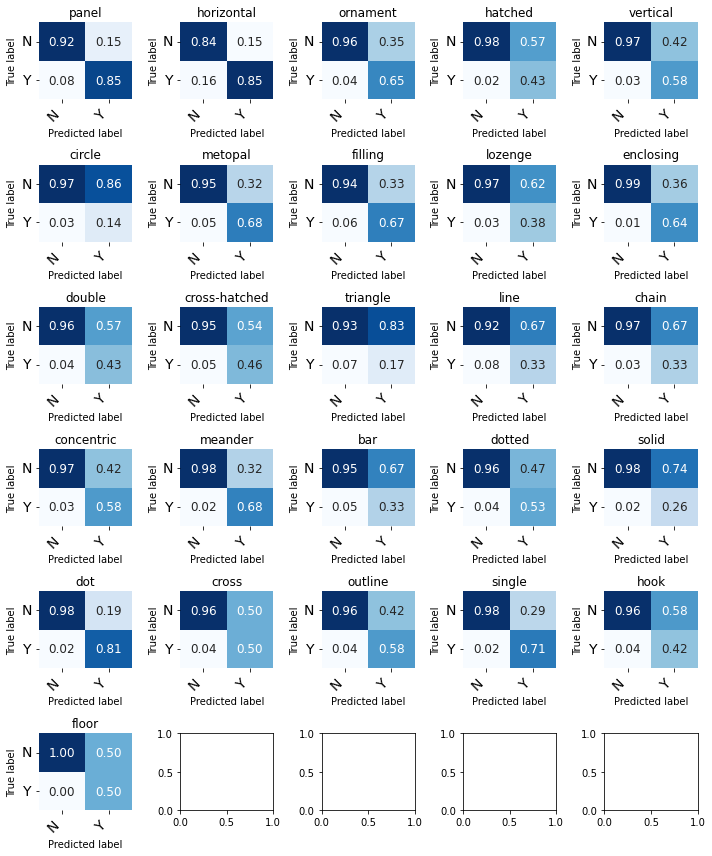

In [132]:
plot_multiple_matrix(cfs_matrix, present_labels, nrows=6, ncols=5, figsize=(10,12), normalize=True)
#plot_multiple_matrix(cfs_matrix, present_labels, figsize=(11, 11))

In [133]:
# Plotting linemarks
ALREADY_RUN = False 

# This code has to be executed only once in order to have the same linemarks in 
# each figure
if not ALREADY_RUN:
  import random
  linemark = []
  MARKERS = ['.','+','v','x','*']
  LINE_STYLES = ['-','--','-.',':']

  for i in range(0, 20): 
    linestyle = LINE_STYLES[random.randint(0, len(LINE_STYLES)-1)]
    marker = MARKERS[random.randint(0, len(MARKERS)-1)]
    linemark.append (linestyle + marker)  
  ALREADY_RUN = True
print(linemark)

['--*', '-+', ':x', '-x', ':*', '-.*', '-*', '-.v', '-..', '-.v', ':x', '--+', '--+', '-.+', '--*', ':.', '-.*', '-x', '-*', '-.x']


In [134]:
  def plot_results(x, acc = [], loss = [], hscore=[], label=[], title = "",
                 xlabel = "", ylabel = "", plot_emr=False, plot_hl=False, plot_hs=True):
    """plots accuracy, hamming loss and hamming score of multiple classifiers.
    
    Returns:
    DataFrame: filtered labels dataframe

    """
    #assert len(acc) == len(loss) == len(label)
    if plot_emr:
        f_acc = plt.figure(1)
        f_acc.set_figheight(9)
        f_acc.set_figwidth(7)
        ax1 = f_acc.add_subplot(111)
        ax1.set_title(title + "\n Accuracy")
        ax1.set_xlabel(xlabel)
        ax1.set_ylabel(ylabel)
        ax1.set_ylim(0, 1)
        for i in range(0, len(acc)):
          ax1.plot(x, acc[i],  linemark[i], label=label[i])
        ax1.legend()
        f_acc.show()
    if plot_hl:
        f_loss = plt.figure(2)
        f_loss.set_figheight(9)
        f_loss.set_figwidth(7)
        ax2 = f_loss.add_subplot(111)
        ax2.set_title(title  + "\n Hamming Loss")
        ax2.set_xlabel(xlabel)
        ax2.set_ylabel(ylabel)
        for i in range(0, len(loss)):
          ax2.plot(x, loss[i], linemark[i], label=label[i])
        ax2.legend()
        f_loss.show()

    if plot_hs:
        h_score = plt.figure(3)
        h_score.set_figheight(9)
        h_score.set_figwidth(7)
        ax3 = h_score.add_subplot(111)
        ax3.set_title(title)
        ax3.set_xlabel(xlabel)
        ax3.set_ylabel(ylabel)
        ax3.set_ylim(0, 0.6)
        ax3.grid(which='both')
        #ax3.set_xlim(0, 100)
        for i in range(0, len(hscore)):
          ax3.plot(x, hscore[i], linemark[i], label=label[i])
        ax3.legend()
        h_score.show()

C:\Users\m_jvs\AppData\Local\Temp\ipykernel_10912\2049846631.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  h_score.show()


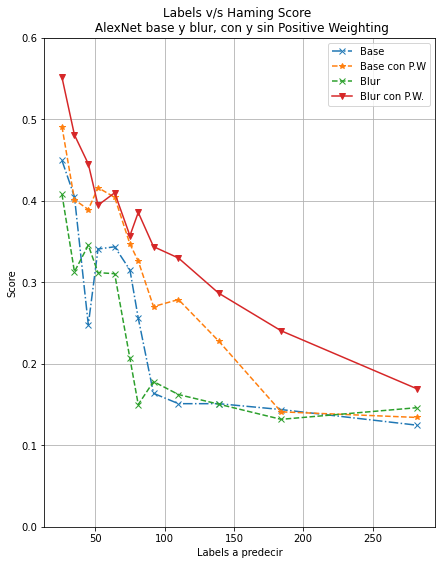

In [119]:
x = [26, 35, 45, 52, 64, 75, 81, 92, 110, 139, 184, 282]
hs_base_nw = [0.4493, 0.4048, 0.2478, 0.3407, 0.3434, 0.3150, 
              0.2560, 0.1637, 0.1510, 0.1510, 0.1438, 0.1246]
hs_base_pw = [0.4909, 0.4012, 0.3891, 0.4159, 0.4041, 0.3469,
              0.3259, 0.2701, 0.2787, 0.2278, 0.1410, 0.1341]
hs_blur_nw = [0.4079, 0.3128, 0.3453, 0.3117, 0.3104, 0.2066,
              0.1499, 0.1781, 0.1622, 0.1504, 0.1318, 0.1461]
hs_blur_pw = [0.5513, 0.4806, 0.4450, 0.3944, 0.4096, 0.3570,
              0.3855, 0.3436, 0.3296, 0.2865, 0.2404, 0.1692]
hs = [hs_base_nw, hs_base_pw, hs_blur_nw, hs_blur_pw]
labels = ["Base", "Base con P.W", "Blur", "Blur con P.W."]
plot_results(x,
             hscore = hs,
             label = labels,
             title = "Labels v/s Haming Score \n AlexNet base y blur, con y sin Positive Weighting",
            xlabel = "Labels a predecir", ylabel = "Score")